In [89]:
import dimers_util
from dimers_util import *
import dimers_sim
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
import matplotlib.pyplot as plt
import matplotlib
from importlib import reload 
import pickle
from scipy.optimize import curve_fit

reload(dimers_util)
reload(dimers_sim)

<module 'dimers_sim' from 'C:\\Users\\ofir\\OneDrive - Technion\\Research - PhD\\DynamicalConfinement\\DymerKrylov\\dimers_sim.py'>

In [55]:
d_sim = [20]
L_sim = 25
times_sim = 70
nums_sim = 120
simulator = dimers_sim.Simulator(L=L_sim, times=times_sim, d=d_sim, nums=nums_sim, d_procs_num=1, batch_subprocs_num=6)
r = simulator.parallel_analysis()

Starting 23, 130 | 2022_12_14__16_52
Waiting for all processes to close
0 items waiting
All processes closed
1 items waiting
Finished parallel_analysis for  L =  25, times = 70, d = [20], nums = 120 | 2022_12_14__16_52


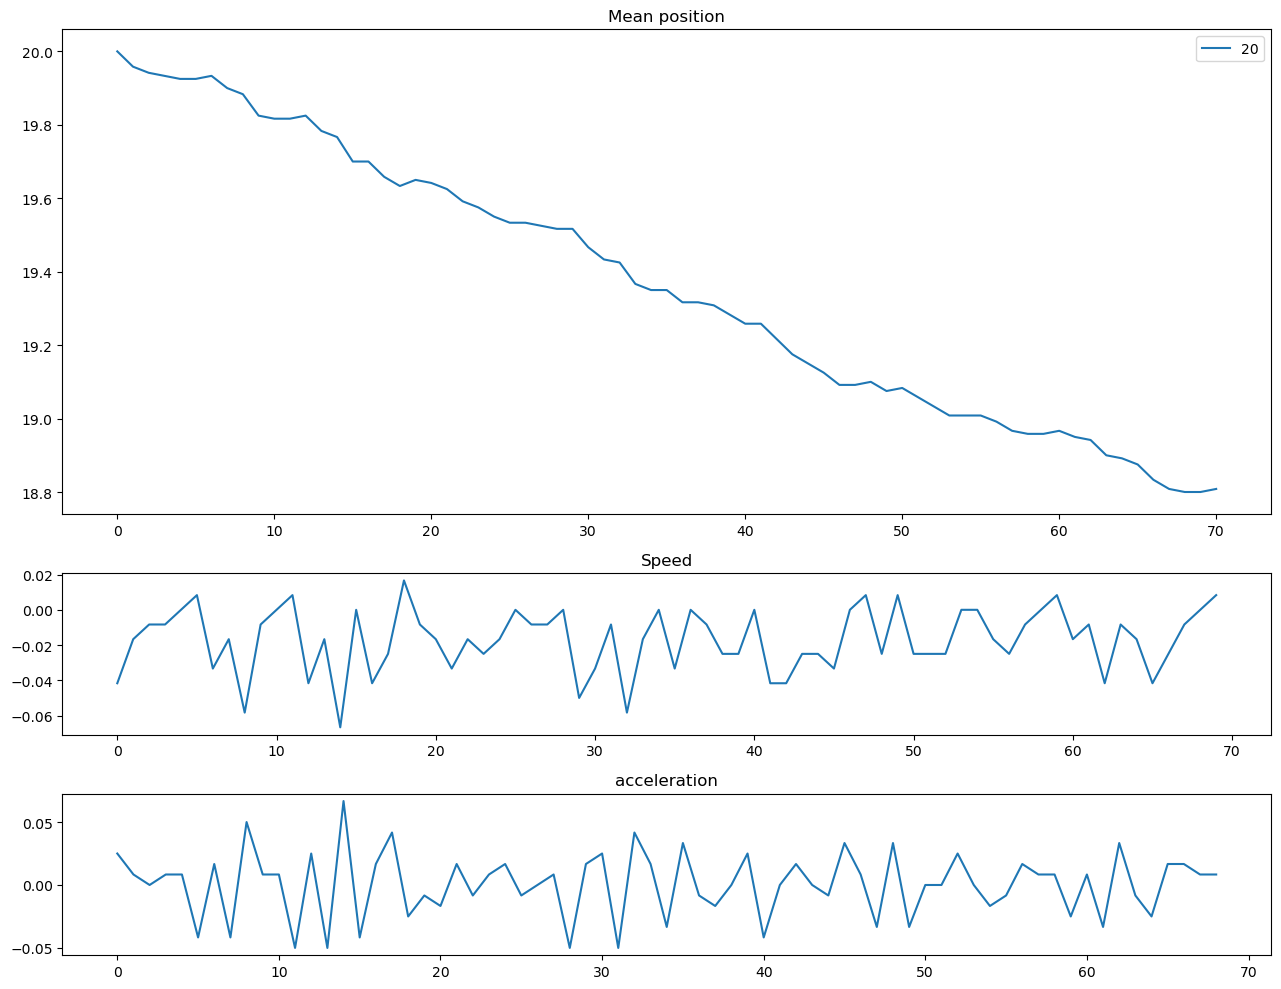

In [57]:
dimers_sim.plot_analysis(simulator.analysis_rhos, L_sim, times_sim, nums_sim, save=True)

In [80]:
with open('analyses/analysis_L120_t1500_d2022_12_14__17_49.pickle', 'rb') as f:
    ana120 = pickle.load(f)
ana120 = [ana120[0], ana120[1], ana120[3], ana120[4], ana120[2]]

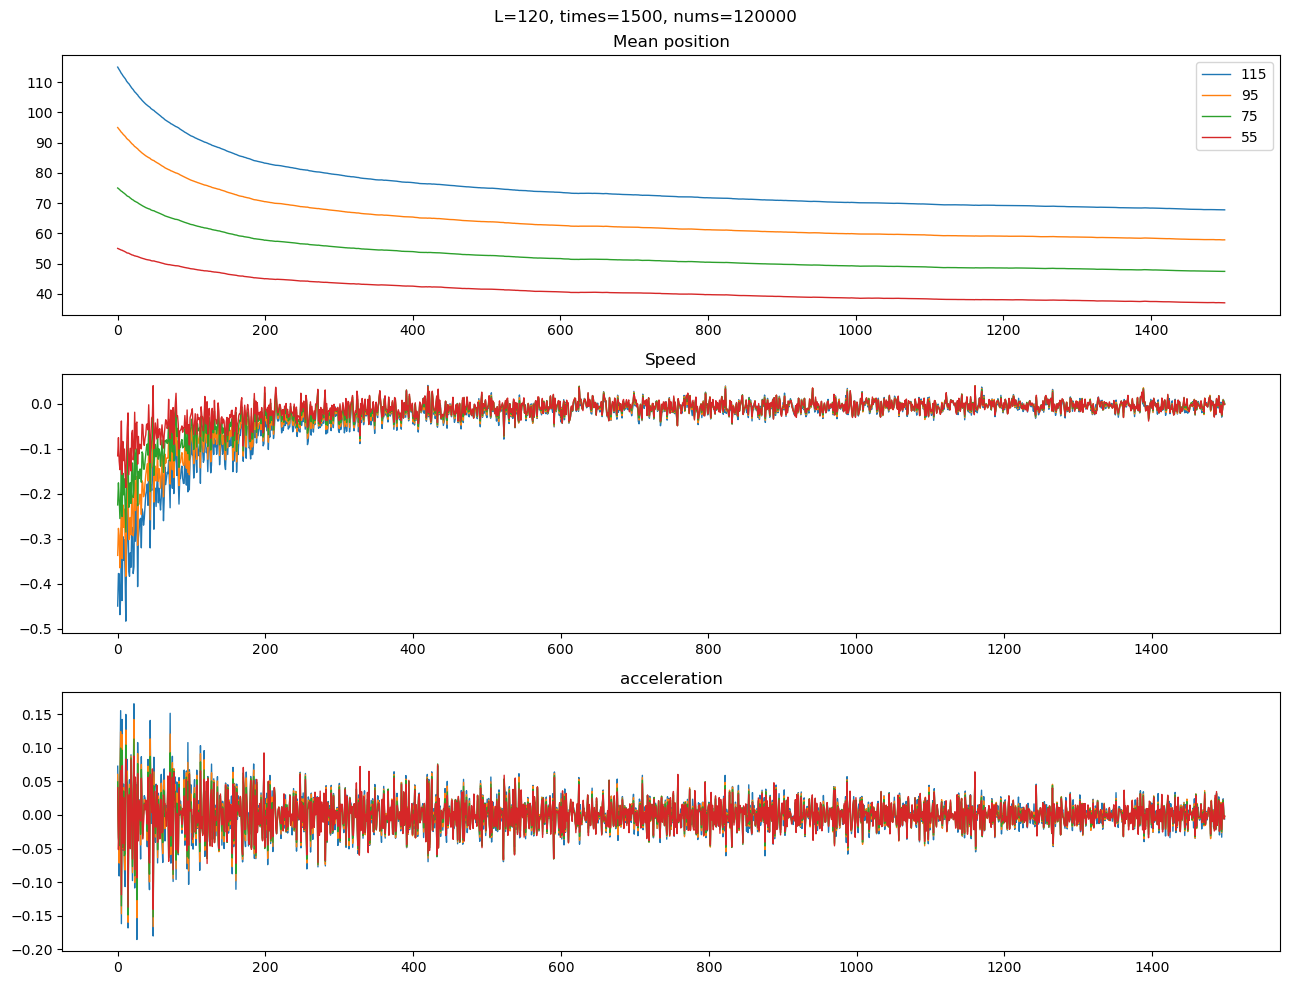

In [81]:
dimers_sim.plot_analysis(ana120, 120, 1500, 120000, save=False)

In [93]:
psi_115 = ana120[1]['Mean']
psi_95 = ana120[2]['Mean']
psi_75 = ana120[3]['Mean']
psi_55 = ana120[4]['Mean']

In [26]:
np.argwhere(psi_75 < psi_55[0])[0]

array([323], dtype=int64)

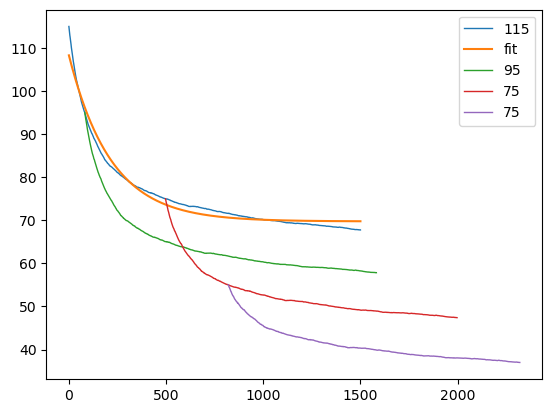

In [94]:
lwdt = 1
plt.plot(range(1501),psi_115, label='115', linewidth=lwdt)
plt.plot(range(1501), [fit_pos(t) for t in range(1501)], label='fit')
plt.plot(range(82,1583),psi_95, label='95',linewidth=lwdt)
plt.plot(range(497,1998),psi_75, label='75', linewidth=lwdt)
plt.plot(range(497+323,497+1824),psi_55, label='75',linewidth=lwdt)
plt.legend()
plt.show()

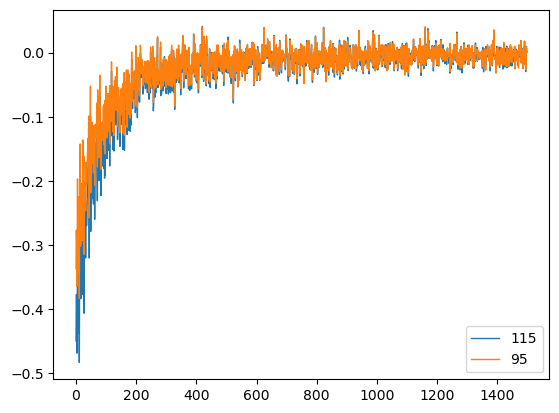

In [95]:
v_115 = ana120[1]['speed']
v_95 = ana120[2]['speed']
v_75 = ana120[3]['speed']
v_55 = ana120[4]['speed']

plt.plot(range(1500),v_115, label='115', linewidth=lwdt)
plt.plot(range(1500),v_95, label='95', linewidth=lwdt)
# plt.plot(range(497,1997),v_75, label='75')
# plt.plot(range(497+323,497+1823),v_55, label='75')
plt.legend()
plt.show()

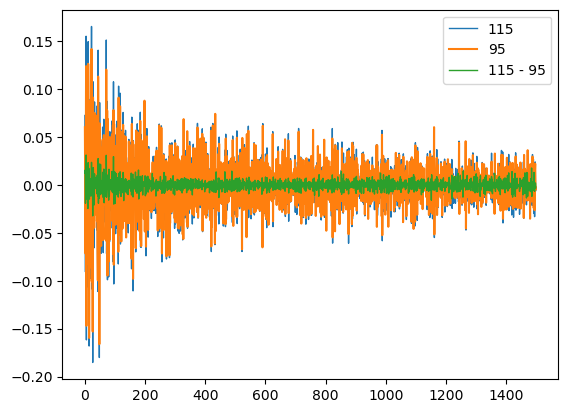

In [92]:
a_115 = ana120[1]['acc']
a_95 = ana120[2]['acc']
a_75 = ana120[3]['acc']
av_55 = ana120[4]['acc']


plt.plot(range(1499),a_115, label='115', linewidth=lwdt)
plt.plot(range(1499),a_95, label='95')
plt.plot(range(1499),a_115 - a_95, label='115 - 95', linewidth=lwdt)
# plt.plot(range(497+323,497+1823),a_55, label='75')
plt.legend()
plt.show()

In [70]:
def pos(t, a, b, c):
    return a * np.exp(-b * t) + c

def fit_pos(t):
    return 3.85593106e+01* np.exp(-4.60296610e-03 * t) + 6.97393853e+01

In [67]:
popt, pcov = curve_fit(pos, range(1501), psi_115)

C:\Users\ofir\AppData\Local\Temp\ipykernel_16376\1417860533.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * t) + c


In [68]:
popt

array([3.85593106e+01, 4.60296610e-03, 6.97393853e+01])

In [69]:
pcov

array([[ 3.05010468e-02,  3.59684983e-06, -9.37374592e-05],
       [ 3.59684983e-06,  1.44392115e-09,  1.21566116e-06],
       [-9.37374592e-05,  1.21566116e-06,  2.58963318e-03]])

In [90]:
np.array([[np.average(a['acc'][100*(i-1):100*i]) for i in range(1,16)] for a in ana120[1:]])

array([[ 3.81759978e-03,  1.68480664e-04, -1.27556210e-04,
         1.90075260e-04,  1.41924408e-04, -9.46014815e-05,
         3.89868400e-04, -1.69702583e-04,  3.28041160e-05,
         7.86850401e-05, -7.55666309e-06,  6.29309628e-05,
        -1.40584440e-05, -6.39735523e-05,  9.73713891e-05],
       [ 2.84557501e-03,  1.46636373e-04, -1.69882486e-04,
         1.45928862e-04,  1.56137955e-04, -9.05608864e-05,
         3.80844081e-04, -1.82109998e-04,  1.00572940e-05,
         5.81892759e-05,  5.07693228e-06,  5.31861086e-05,
         5.26326260e-05, -1.26404371e-04,  9.39631437e-05],
       [ 1.90569029e-03,  8.74424270e-05, -2.05710639e-04,
         1.31660899e-04,  1.49720319e-04, -1.30891400e-04,
         4.16153152e-04, -2.29525422e-04,  6.72367287e-06,
         5.48869184e-05,  8.12882367e-06,  6.15278209e-05,
         2.81603386e-05, -1.27969442e-04,  8.43480327e-05],
       [ 9.62950815e-04,  9.00176889e-05, -2.72652153e-04,
         9.57995206e-05,  1.45029146e-04, -1.41216473

In [74]:
for i in range(1,16):
    print(np.average(ana120[1]['speed'][100*(i-1):100*i]))

-0.22830759095234598
-0.0895134529581759
-0.03876752888412326
-0.025516810808535836
-0.018228173218810328
-0.014186863119744259
-0.008017640084362654
-0.00995037710415886
-0.008706343060137699
-0.0072928248739737
-0.005063529796220934
-0.004386536516757218
-0.004381382499131661
-0.004147462458935252
-0.005901162963051832


In [77]:
ana120[1]['Mean'][-1]

67.76323207015346